In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2024-ml-w4p2/train.csv
/kaggle/input/2024-ml-w4p2/test.csv
/kaggle/input/2024-ml-w4p2/sample_submit.csv


In [2]:
#랜덤시드 고정
import random
import os

seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

In [3]:
#pandas 라이브러리를 통한 데이터 불러오기

train = pd.read_csv('/kaggle/input/2024-ml-w4p2/train.csv')
test = pd.read_csv('/kaggle/input/2024-ml-w4p2/test.csv')
submit = pd.read_csv('/kaggle/input/2024-ml-w4p2/sample_submit.csv')

In [4]:
#데이터 실수화
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()

train['model'] = classle.fit_transform(train['model'].values)
test['model'] = classle.fit_transform(test['model'].values)
print(train['model'])

0        15
1        87
2        26
3        26
4         2
         ..
34165     0
34166    25
34167    25
34168    33
34169    25
Name: model, Length: 34170, dtype: int64


In [5]:
#데이터 분할
from sklearn.model_selection import train_test_split

X = train.drop('price', axis = 1)
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [6]:
#정규화
from sklearn.preprocessing import StandardScaler

std=StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)
test_std = std.fit_transform(test)

In [7]:
#KNN 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

#정확도 저장할 배열
test_mae = []

#정확도 측정 범위 1~20
neighbors_settings = range(1, 21)

In [8]:
for i in neighbors_settings:
    regressor = KNeighborsRegressor(n_neighbors = i, p = 1, weights = "distance")
    regressor.fit(X_train_std, y_train)
    test_mae.append(mean_absolute_error(y_test, regressor.predict(X_test_std)))

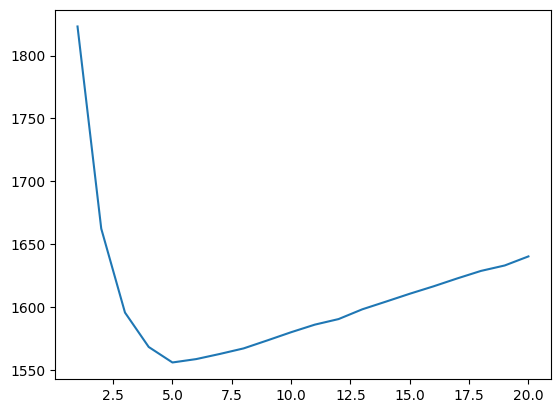

In [9]:
#정확도 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(neighbors_settings, test_mae, label="test_mae")
plt.show()